<a href="https://colab.research.google.com/github/scsanjay/ml_from_scratch/blob/main/06.%20Support%20Vector%20Machine/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Custom implementation of Support Vector Machine (Support Vector Classifier)

**You can check the loss function and it's gradient calculation - https://i.imgur.com/HZgYobv.jpeg**

In [ ]:
class SVM():
  """
  SGD implementation of Support Vector Machine

  Parameters
  ----------
  C : float, default = 1
    Regularization parameter
  
  alpha : float, default = 0.0001
    Learning rate

  epoch : int, default = 1000

  Attributes
  ----------
  weights : array of size n_features
  """

  def __init__ (self, C=1, alpha=0.0001, epoch=1000):
    self.C = C
    self.alpha = alpha
    self.epoch = epoch

  def _get_hinge(self, x, y, w):
    """ Get Hinge Loss """
    return np.maximum(0, 1-y*np.dot(w,x))

  def fit(self, X_train, y_train):
    """
    It will find the margin maximising hyperplane that best separate the data.

    Parameters
    ----------
    X_train : array of shape (n_samples, n_features)

    Y_train : array of shape (n_samples)

    Returns
    -------
    self : object
    """

    # initialize weights and bias to 0s
    w = np.zeros(len(X_train[0]))

    n = len(y_train)

    # epoch iterations
    for j in range(self.epoch):
      
      # loop over all training data
      for i in range(n):
        x = X_train[i]
        y = y_train[i]

        # weight and bias gradient
        if (self._get_hinge(x, y, w)==0):
            dw = w
        else:
            # since it is sgd 1/n is not required
            dw = w - self.C * y * x

        # update weights and bias based on gradient and learning rate
        learning_rate = self.alpha
        w = w-learning_rate*dw
    
    # set weights and bias attributes
    self.weights = w
    return self

  def predict (self, X_test):
    """
    It will predict the output classes for the test data.

    Parameters
    ----------
    X_test : array of shape (n_samples, n_features)

    Returns
    -------
    predictions : array of shape (n_samples,)
    """
    # calculate predictions
    predictions = np.sign(np.dot(self.weights, X_test.T)) 

    return predictions


## Validating the implementation

In [ ]:
# load and split the breast cancer data
data = load_breast_cancer()
independent_variables = data.data
dependent_variable = data.target
# y should be {-1,1}
dependent_variable[dependent_variable==0] = -1

X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, train_size=.8)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# x = <x,1> concate 1 to accomodate w0 in w
X_train = np.hstack((X_train, np.ones((len(y_train),1))))
X_test = np.hstack((X_test, np.ones((len(y_test),1))))

In [ ]:
# tune the model
model = SVM(C=1, alpha=0.0001, epoch=1000)
# fit the model
model.fit(X_train, y_train)
# predict the classes
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9824561403508771

**Accuracy 98% which is very good. But it's imbalanaced data, so we need to look at confusion matrix.**

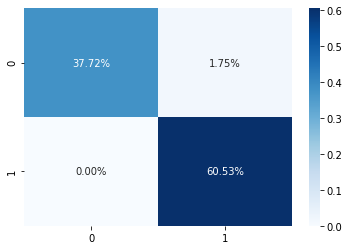

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

**Confusion matrix also looks very good, both classes are well classified.**